## Craft a Story from a Dataset

Make sure that your story is appropriate to the audience type you selected.

Submit links to a GitHub repository containing a Jupyter Notebook or a PowerPoint. The file should contain:

1. The questions you asked
2. The trends you investigated
3. The resulting visualizations and conclusions

Exercise Steps
1. Select a dataset - any dataset! Make sure it's not too dirty, as this case study is
about storytelling, not cleaning... :)
2. Pick your audience: executive, technical, or non-technical; and adjust your tone
accordingly.
3. Take a look at the data: explore it.
4. Think of a narrative, and pursue it.
5. Give a 15 mins presentation to your mentor during your next call. 

In your quest, you might need to ask a bunch of other questions, such as:

● Can I count something interesting?

● Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?

● Can I make a bar plot or a histogram?

● Can I compare two related quantities? 

● Can I make a scatterplot?

● Can I make a time-series plot?

● Looking at the plots, what are some insights I can make?

● Can I see any correlations?

● Is there a hypothesis I can - and should - investigate further?

● What other questions are the insights leading me to ask? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import os
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from dython.nominal import associations, numerical_encoding, cluster_correlations
from dython.data_utils import split_hist

from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go


In [2]:
sns.set_theme(style='whitegrid', palette='pastel')

In [3]:
url = "https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/fatal-police-shootings-data.csv"
data = pd.read_csv(url)
df = data.copy()

# make sure it is still updating as a copy

In [4]:
df.describe()

id          age    longitude     latitude
count  7607.000000  7153.000000  6812.000000  6812.000000
mean   4202.816353    37.153502   -97.051749    36.665660
std    2376.282960    12.944736    16.602351     5.395637
min       3.000000     2.000000  -160.007000    19.498000
25%    2134.500000    27.000000  -112.039750    33.479750
50%    4229.000000    35.000000   -94.226000    36.093000
75%    6263.500000    45.000000   -83.073250    40.023500
max    8284.000000    92.000000   -67.867000    71.301000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7607 entries, 0 to 7606
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7607 non-null   int64  
 1   name                     7217 non-null   object 
 2   date                     7607 non-null   object 
 3   manner_of_death          7607 non-null   object 
 4   armed                    7398 non-null   object 
 5   age                      7153 non-null   float64
 6   gender                   7590 non-null   object 
 7   race                     6222 non-null   object 
 8   city                     7607 non-null   object 
 9   state                    7607 non-null   object 
 10  signs_of_mental_illness  7607 non-null   bool   
 11  threat_level             7607 non-null   object 
 12  flee                     6783 non-null   object 
 13  body_camera              7607 non-null   bool   
 14  longitude               

In [6]:
df.head(5)

id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  longitude  latitude  is_geocoding_exact  
0  Not fleeing        False   -123.122    47.247                True  
1  Not fleeing        False   -122.892    45.487                True  
2  Not fleeing        False    -97.281    37.695                True  
3  Not fleeing        False   -122.422    37.763                True  
4  Not fleeing        False   -104.692    40.384                True

In [7]:
df.isna().sum()

id                            0
name                        390
date                          0
manner_of_death               0
armed                       209
age                         454
gender                       17
race                       1385
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        824
body_camera                   0
longitude                   795
latitude                    795
is_geocoding_exact            0
dtype: int64

In [8]:
df['date'].max()
# downloaded dataframe earlier than this?

'2022-07-26'

In [9]:
nunique = df.nunique().sort_values()
print('Number of Unique Values by Column' + '\n')
nunique

Number of Unique Values by Column



is_geocoding_exact            2
body_camera                   2
manner_of_death               2
gender                        2
signs_of_mental_illness       2
threat_level                  3
flee                          4
race                          6
state                        51
age                          81
armed                       101
date                       2578
city                       3123
latitude                   5279
longitude                  5968
name                       7184
id                         7607
dtype: int64

In [10]:
# unique values in column
columns = df.columns
print('List of Unique Values by Column' + '\n' + '\n')
for col in columns:
    print(f'{col}:  {str(df[col].unique())} \n')

List of Unique Values by Column


id:  [   3    4    5 ... 8283 8284 8282] 

name:  ['Tim Elliot' 'Lewis Lee Lembke' 'John Paul Quintero' ... 'Tyrone Jones'
 'Jeremiah Jones' 'Sean Christopher McCormick'] 

date:  ['2015-01-02' '2015-01-03' '2015-01-04' ... '2022-07-24' '2022-07-25'
 '2022-07-26'] 

manner_of_death:  ['shot' 'shot and Tasered'] 

armed:  ['gun' 'unarmed' 'toy weapon' 'nail gun' 'knife' nan 'shovel' 'vehicle'
 'hammer' 'hatchet' 'sword' 'machete' 'box cutter' 'undetermined'
 'metal object' 'screwdriver' 'lawn mower blade' 'flagpole'
 'guns and explosives' 'cordless drill' 'crossbow' 'BB gun' 'metal pole'
 'Taser' 'metal pipe' 'metal hand tool' 'blunt object' 'metal stick'
 'sharp object' 'meat cleaver' 'carjack' 'chain' "contractor's level"
 'railroad spikes' 'stapler' 'beer bottle' 'unknown weapon' 'binoculars'
 'pellet gun' 'bean-bag gun' 'baseball bat and fireplace poker'
 'straight edge razor' 'gun and knife' 'ax' 'brick' 'baseball bat'
 'hand torch' 'chain saw' 'ga

# data wrangling and cleaning

In [11]:
# drop name and id columns
df.drop(columns=['name', 'id'], inplace=True)

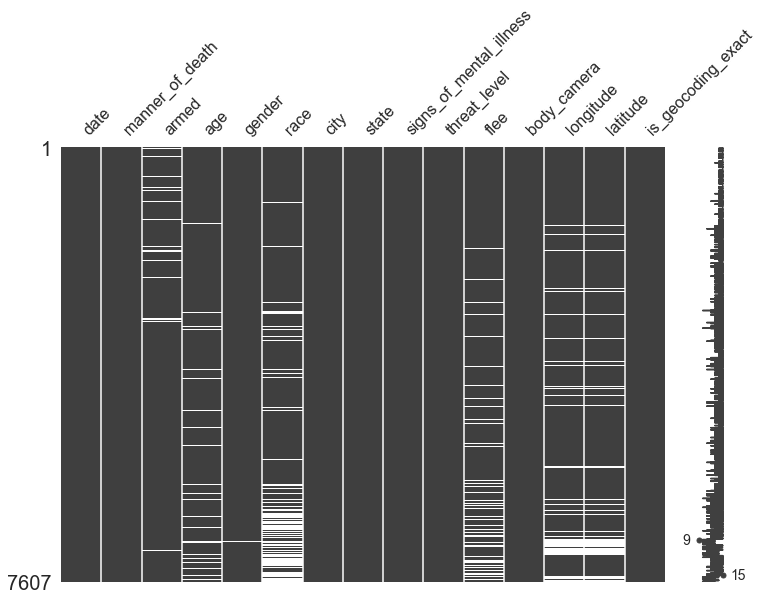

In [12]:
msno.matrix(df, figsize=(12,8))
plt.show()

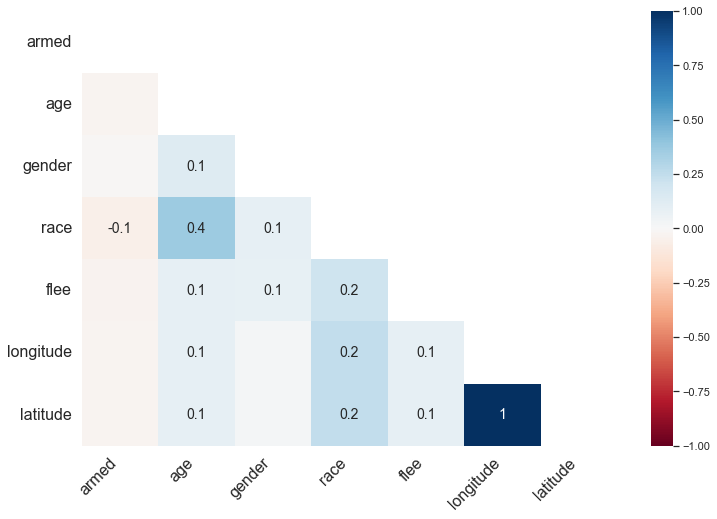

In [13]:
# check if missing data is correlated
msno.heatmap(df, figsize=(12,8))
plt.show()

In [14]:
df['flee'].value_counts()/len(df['flee'])

Not fleeing    0.564743
Car            0.162088
Foot           0.128040
Other          0.036808
Name: flee, dtype: float64

In [15]:
df['gender'].value_counts()/len(df['gender'])

M    0.952675
F    0.045090
Name: gender, dtype: float64

In [16]:
df['race'].value_counts()/len(df['race'])

W    0.417247
B    0.219798
H    0.147496
A    0.014460
N    0.012751
O    0.006179
Name: race, dtype: float64

In [17]:
# handle null values

# make null flee 'Not fleeing', as 
df['flee'] = df['flee'].fillna('Not fleeing')

# impute most common gender 'M' for null -- only 4% of shooting are female
df['gender'] = df['gender'].fillna('M')

# impute 'None' for null race -- 'None' is unknown according to WaPo GitHub
# don't want to make assumptions on race to skew data unnecessarily
df['race'] = df['race'].fillna('None')

# make null age median age of that state
df['age'] = df.groupby('state')['age'].apply(lambda x: x.fillna(x.median()))

# armed null now 'undetermined'
df['armed'] = df['armed'].fillna('undetermined')

In [18]:
# correct data types
df['age'] = df['age'].astype(int)

In [19]:
# T/F values to 1/0
#vals = {True:1, False:0}
#df['body_camera'] = df['body_camera'].map(vals)
#df['signs_of_mental_illness'] = df['signs_of_mental_illness'].map(vals)

manner = {'shot':'shot', 'shot and Tasered':'tasered and shot'}
df['manner_of_death'] = df['manner_of_death'].map(manner)

In [20]:
# Race labels for visualization
race_dict = {'A':'Asian','B':'Black','H':'Hispanic','N':'Native','W':'White','O':'Other','None': 'None'}
df['race'] = df['race'].map(race_dict)

In [21]:
# bin age
df['age_binned'] = pd.cut(x=df['age'], bins=[-np.inf, 18, 30, 45, 60, 75, np.inf], labels=['Under 18','18-29', '30-44', '45-59', '60-75', 'Over 75'])


In [22]:
# organizing 'armed' feature by creating difference breakdowns from over 100 different categories

unarmed = ['unarmed', 'toy weapon']
d_unarmed = dict.fromkeys(unarmed, 'unarmed')

armed = ['gun', 'guns and explosives', 'gun and knife','gun and sword', 'gun and car', 'gun and machete', 'vehicle and gun',
         'gun and vehicle', 'nail gun', 'knife', 'shovel', 'vehicle','hammer', 'hatchet', 'sword', 'machete', 'box cutter',
         'metal object', 'screwdriver', 'lawn mower blade', 'flagpole', 'cordless drill', 'crossbow', 'BB gun', 'metal pole',
         'Taser', 'metal pipe', 'metal hand tool', 'blunt object', 'metal stick', 'sharp object', 'meat cleaver','carjack',
         'chain', "contractor's level", 'railroad spikes', 'stapler', 'beer bottle', 'unknown weapon', 'binoculars',
         'pellet gun', 'bean-bag gun', 'baseball bat and fireplace poker', 'straight edge razor', 'ax', 'brick',
         'baseball bat','hand torch', 'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe','flashlight', 'baton',
         'spear', 'chair', 'pitchfork', 'hatchet and gun', 'rock','piece of wood', 'pipe', 'glass shard', 'motorcycle',
         'pepper spray','metal rake', 'crowbar', 'oar', 'machete and gun', 'tire iron', 'air conditioner', 'pole and knife',
         'baseball bat and bottle', 'fireworks','pen', 'chainsaw','incendiary device', 'samurai sword', 'bow and arrow',
         'wrench', 'walking stick', 'barstool', 'grenade','BB gun and vehicle', 'wasp spray', 'air pistol', 'Airsoft pistol',
         'baseball bat and knife', 'vehicle and machete','ice pick','car, knife and mace', 'bottle', 'microphone',
         'knife and vehicle', 'machete and hammer', 'stake', 'incendiary weapon','ax and machete', 'unknown weapon']
d_armed = dict.fromkeys(armed, 'armed')

undetermined = ['claimed to be armed', 'undetermined']
d_und = dict.fromkeys(undetermined, 'undetermined')

armed_3 = {**d_unarmed, **d_armed, **d_und}

df['armed_3'] = df['armed'].map(armed_3)

In [23]:
# differentiate guns
unarmed = ['unarmed', 'toy weapon']
d_unarmed = dict.fromkeys(unarmed, 'unarmed')

armed_gun = ['gun', 'guns and explosives', 'gun and knife','gun and sword', 'gun and car', 'gun and machete', 'vehicle and gun',
         'gun and vehicle']
d_armed_gun = dict.fromkeys(armed_gun, 'gun')

armed_other = ['nail gun', 'knife', 'shovel', 'vehicle','hammer', 'hatchet', 'sword', 'machete', 'box cutter',
         'metal object', 'screwdriver', 'lawn mower blade', 'flagpole', 'cordless drill', 'crossbow', 'BB gun', 'metal pole',
         'Taser', 'metal pipe', 'metal hand tool', 'blunt object', 'metal stick', 'sharp object', 'meat cleaver','carjack',
         'chain', "contractor's level", 'railroad spikes', 'stapler', 'beer bottle', 'unknown weapon', 'binoculars',
         'pellet gun', 'bean-bag gun', 'baseball bat and fireplace poker', 'straight edge razor', 'ax', 'brick',
         'baseball bat','hand torch', 'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe','flashlight', 'baton',
         'spear', 'chair', 'pitchfork', 'hatchet and gun', 'rock','piece of wood', 'pipe', 'glass shard', 'motorcycle',
         'pepper spray','metal rake', 'crowbar', 'oar', 'machete and gun', 'tire iron', 'air conditioner', 'pole and knife',
         'baseball bat and bottle', 'fireworks','pen', 'chainsaw','incendiary device', 'samurai sword', 'bow and arrow',
         'wrench', 'walking stick', 'barstool', 'grenade','BB gun and vehicle', 'wasp spray', 'air pistol', 'Airsoft pistol',
         'baseball bat and knife', 'vehicle and machete','ice pick','car, knife and mace', 'bottle', 'microphone',
         'knife and vehicle', 'machete and hammer', 'stake', 'incendiary weapon','ax and machete', 'unknown weapon']
d_armed_other = dict.fromkeys(armed_other, 'other weapon')

undetermined = ['claimed to be armed', 'undetermined']
d_und = dict.fromkeys(undetermined, 'undetermined')

armed_4 = {**d_unarmed, **d_armed_gun, **d_armed_other, **d_und}

df['armed_4'] = df['armed'].map(armed_4)

In [24]:
# further stratified
unarmed = ['unarmed', 'toy weapon']
d_unarmed = dict.fromkeys(unarmed, 'unarmed')

gun = ['gun', 'guns and explosives', 'gun and knife','gun and sword', 'gun and car', 'gun and machete', 
           'vehicle and gun', 'gun and vehicle']
d_gun = dict.fromkeys(gun, 'gun')

knife = ['knife','hatchet','sword','machete','box cutter', 'lawn mower blade','sharp object', 'meat cleaver',
    'straight edge razor', 'ax', 'chain saw', 'garden tool', 'scissors', 'pick-axe','spear', 'pitchfork', 'hatchet and gun', 'machete and gun', 'pole and knife', 
    'chainsaw','samurai sword','baseball bat and knife', 'vehicle and machete', 'ice pick','car, knife and mace', 'knife and vehicle', 'machete and hammer',
    'ax and machete']
d_knives = dict.fromkeys(knife, 'knife/cutting instrument')

# separated toy guns from airsoft, bb guns, and pellet guns
air_bb = ['BB gun', 'pellet gun', 'BB gun and vehicle', 'air pistol', 'Airsoft pistol']
d_air_bb = dict.fromkeys(air_bb, 'air/bb/pellet guns')

toy = ['toy weapon']
d_toy = dict.fromkeys(toy, 'toy weapon')

other = ['nail gun', 'shovel', 'vehicle','hammer', 'metal object', 'screwdriver', 'flagpole', 'cordless drill',
         'crossbow','metal pole','Taser', 'metal pipe', 'metal hand tool','blunt object', 'metal stick','carjack',
         'chain', "contractor's level", 'railroad spikes', 'stapler', 'beer bottle', 'unknown weapon','binoculars',
         'bean-bag gun', 'baseball bat and fireplace poker', 'brick', 'baseball bat','hand torch','pole', 'flashlight',
         'baton','chair','pitchfork', 'rock','piece of wood', 'pipe', 'glass shard', 'motorcycle', 'pepper spray',
         'metal rake', 'crowbar', 'oar', 'tire iron', 'air conditioner', 'baseball bat and bottle', 'fireworks',
         'pen','incendiary device', 'bow and arrow', 'wrench', 'walking stick','barstool', 'grenade', 'wasp spray',
         'bottle', 'microphone','stake', 'incendiary weapon','unknown weapon'] 
d_other = dict.fromkeys(other, 'other weapon')

undetermined: ['claimed to be armed', 'undetermined']
d_undet = dict.fromkeys(undetermined, 'undetermined')

armed_7 = {**d_unarmed, **d_gun, **d_knives, **d_air_bb, **d_toy, **d_other, **d_undet}

df['armed_7'] = df['armed'].map(armed_7)

In [25]:
#df.drop(columns='armed', inplace=True)

# 'armed' is often updated with a specific weapon not otherwise in the list, causing null values in 'armed_3' etc.

notes:

*threat_level:* The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats.

*is_geocoding_exact:* False means centroid area [lat,long]; True means [lat,long] within approximately 100 meters

*armed:* undetermined includes nan; armed_other includes (explosives, fire, blunt objects, melee weapons, bean bag gun)

In [26]:
df['count'] = 1

In [27]:
# make MM-YY column from date
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
# make YY column from date
df['year'] = df['date'].dt.year
# make quarter column from date
df['quarter'] = df['date'].dt.quarter

In [28]:
# make separate df with latitude and longitude and remove from df
coord_df = df.copy()
df.drop(columns=['latitude','longitude'], inplace=True)
coord_df['latitude'] = coord_df['latitude'].astype(float)
coord_df['longitude'] = coord_df['longitude'].astype(float)

In [29]:
coord_df.isna().sum()

date                         0
manner_of_death              0
armed                        0
age                          0
gender                       0
race                         0
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                         0
body_camera                  0
longitude                  795
latitude                   795
is_geocoding_exact           0
age_binned                   0
armed_3                     13
armed_4                     13
armed_7                     13
count                        0
month                        0
year                         0
quarter                      0
dtype: int64

In [30]:
df.isna().sum()

date                        0
manner_of_death             0
armed                       0
age                         0
gender                      0
race                        0
city                        0
state                       0
signs_of_mental_illness     0
threat_level                0
flee                        0
body_camera                 0
is_geocoding_exact          0
age_binned                  0
armed_3                    13
armed_4                    13
armed_7                    13
count                       0
month                       0
year                        0
quarter                     0
dtype: int64

In [31]:
df.columns

Index(['date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city',
       'state', 'signs_of_mental_illness', 'threat_level', 'flee',
       'body_camera', 'is_geocoding_exact', 'age_binned', 'armed_3', 'armed_4',
       'armed_7', 'count', 'month', 'year', 'quarter'],
      dtype='object')

# adding census data

In [32]:
state_pop19 = pd.read_csv('../Fatal-Police-Shootings-WaPo/data/statepop/nst-est2019-popchg2010_2019.csv')

In [33]:
# create state population dataframe
state_pop = pd.DataFrame(columns=['state_name', 'PopEstimate2015', 'PopEstimate2016', 'PopEstimate2017', 'PopEstimate2018', 'PopEstimate2019'])
state_pop[['state_name', 'PopEstimate2015', 'PopEstimate2016', 'PopEstimate2017', 'PopEstimate2018', 'PopEstimate2019']] = state_pop19[['NAME','POPESTIMATE2015', 'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018', 'POPESTIMATE2019']]
# drop regions and PR
state_pop.drop(axis=0, index=[1,2,3,4,56], inplace=True)
state_pop.reset_index(drop=True,inplace=True)

In [34]:
state_pop20_21 = pd.read_csv('../Fatal-Police-Shootings-WaPo/data/statepop/NST-EST2021-popchg2020_2021.csv')

In [35]:
state_pop20_21.drop(axis=0, index=[1,2,3,4,56], inplace=True)
state_pop20_21.reset_index(drop=True, inplace=True)

state_pop[['PopEstimate2020', 'PopEstimate2021']] = state_pop20_21[['POPESTIMATE2020', 'POPESTIMATE2021']]

In [36]:
state_abbrev = {'United States':'Total', 'Alabama':'AL', 'Alaska':'AK', 'Arizona':'AZ', 'Arkansas':'AR', 
                'California':'CA','Colorado':'CO', 'Connecticut':'CT', 'Delaware':'DE','District of Columbia':'DC',
                'Florida':'FL', 'Georgia':'GA', 'Hawaii':'HI', 'Idaho':'ID', 'Illinois': 'IL','Indiana': 'IN',
                'Iowa':'IA', 'Kansas':'KS', 'Kentucky':'KY', 'Louisiana':'LA', 'Maine':'ME', 'Maryland':'MD', 
                'Massachusetts':'MA', 'Michigan':'MI', 'Minnesota':'MN', 'Mississippi':'MS', 'Missouri': 'MO',
                'Montana': 'MT', 'Nebraska':'NE', 'Nevada':'NV', 'New Hampshire':'NH','New Jersey':'NJ', 'New Mexico':'NM',
                'New York':'NY', 'North Carolina':'NC', 'North Dakota':'ND','Ohio':'OH','Oklahoma':'OK', 'Oregon':'OR',
                'Pennsylvania':'PA', 'Rhode Island':'RI', 'South Carolina':'SC','South Dakota':'SD','Tennessee':'TN',
                'Texas':'TX', 'Utah':'UT','Vermont':'VT','Virginia':'VA','Washington':'WA', 'West Virginia':'WV',
                'Wisconsin':'WI', 'Wyoming':'WY'}

state_pop['state'] = state_pop['state_name'].map(state_abbrev)

In [37]:
state_pop.set_index(keys='state', inplace=True)

In [38]:
# merge state pop data
df = pd.merge(df,state_pop, on='state')

intial findings

# Exploratory data analysis

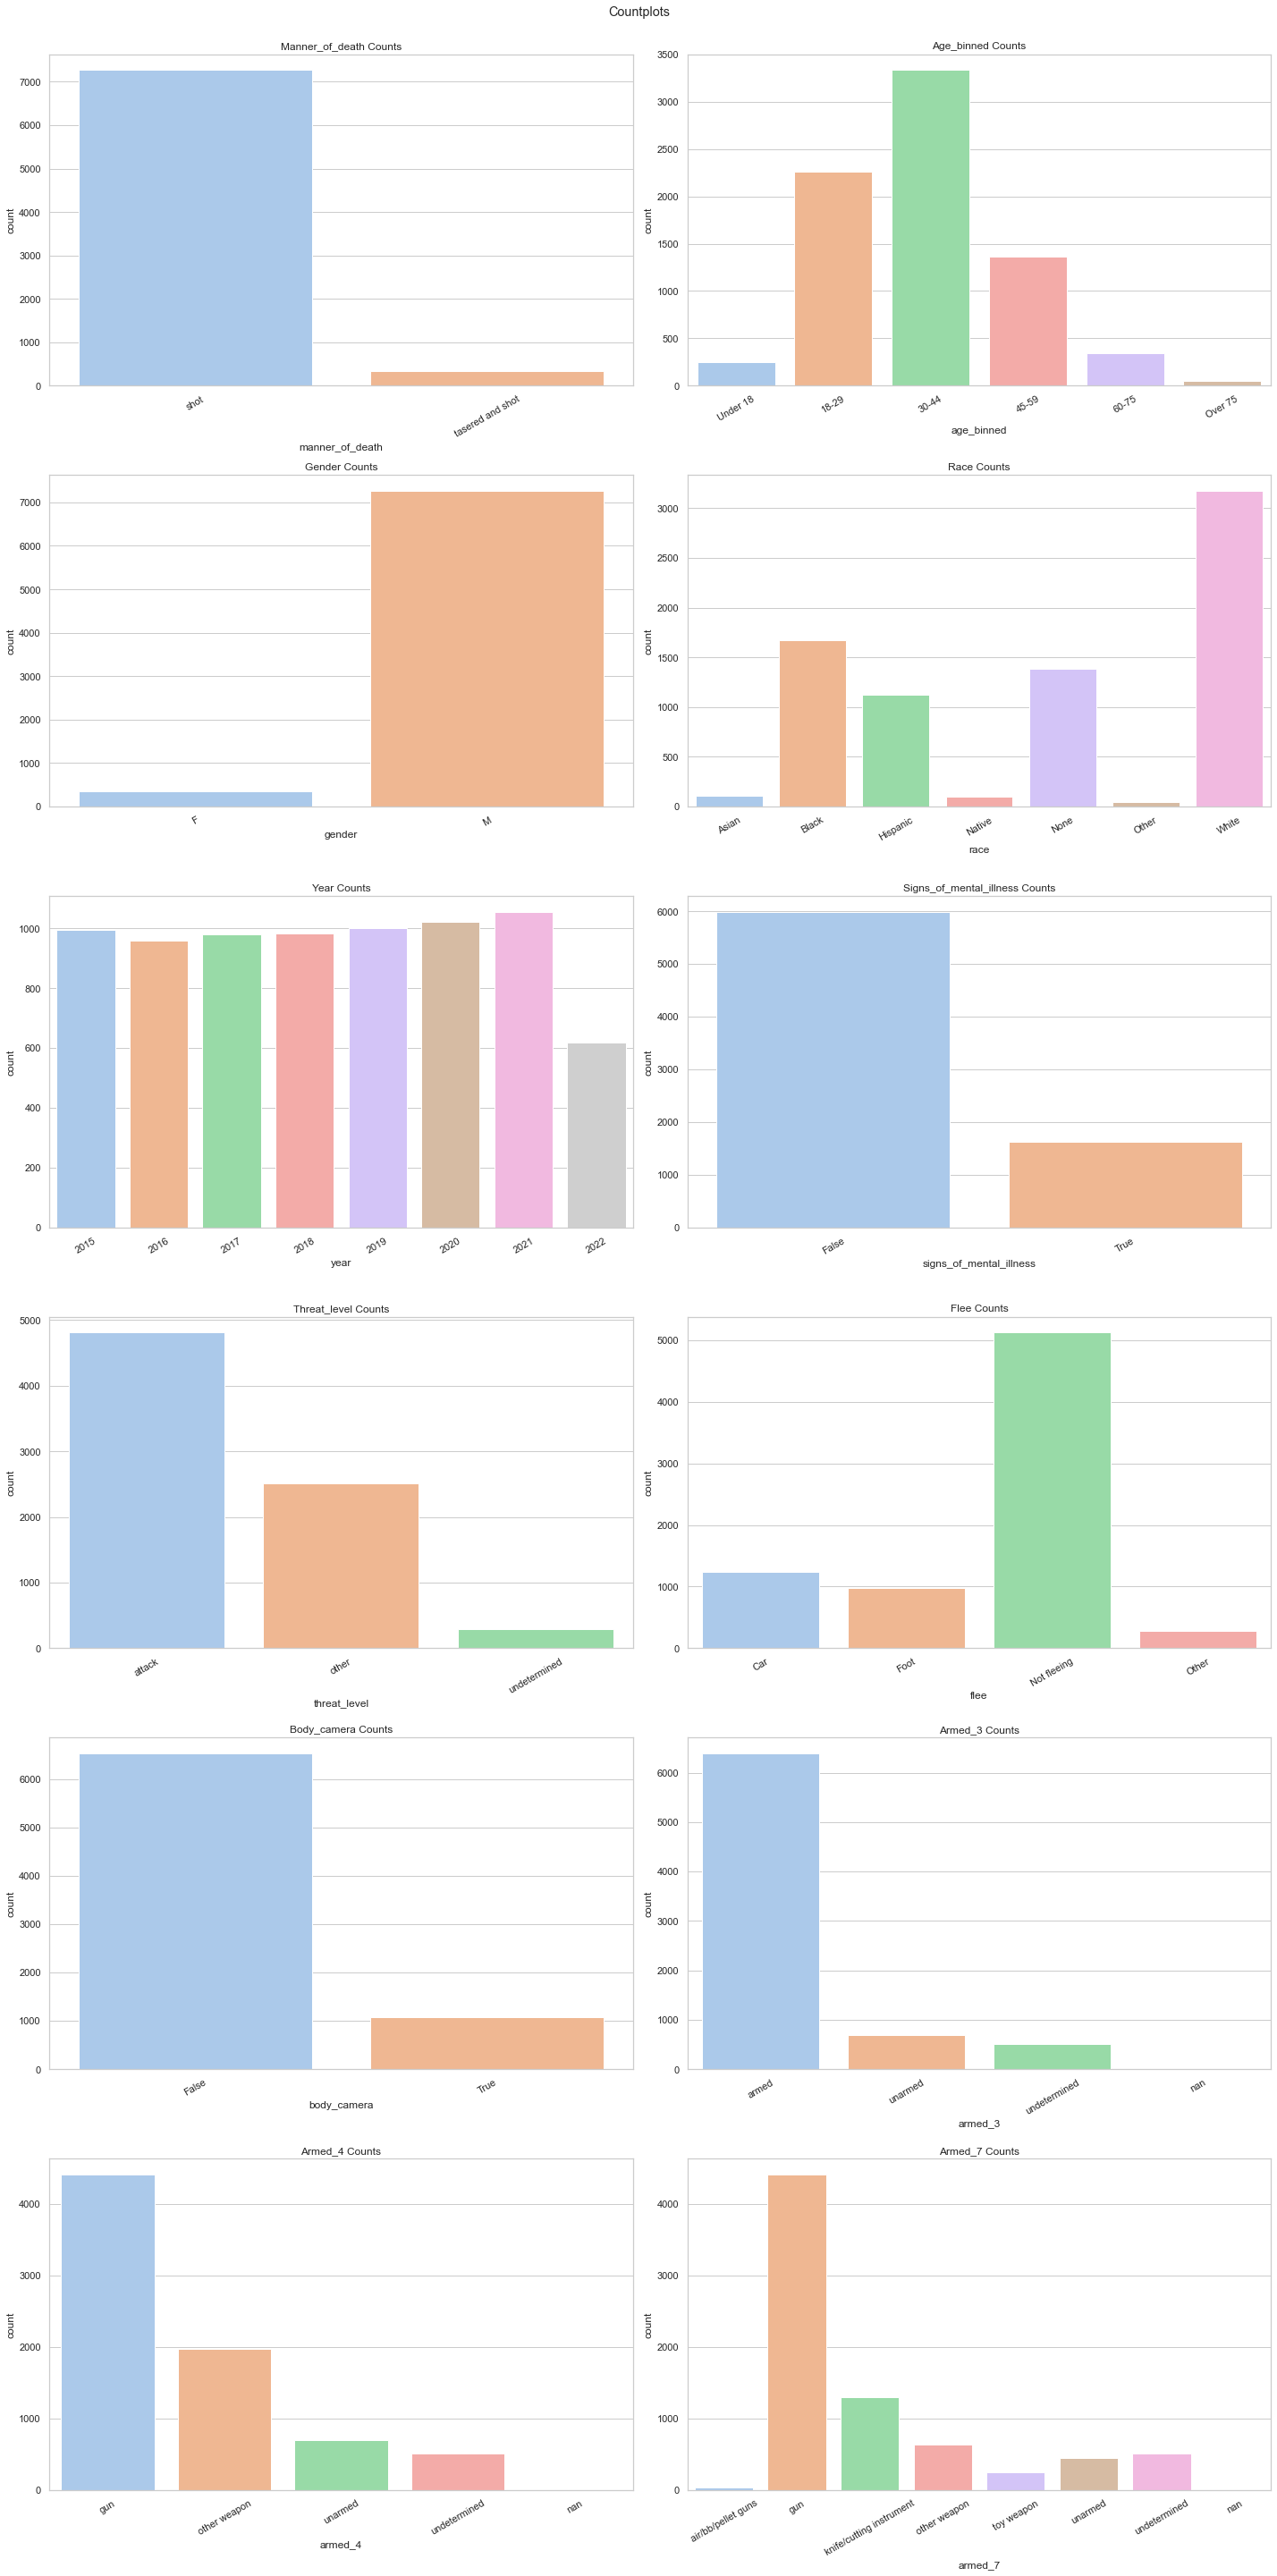

In [39]:
# plot distributions
columns = [['manner_of_death', 'age_binned'], ['gender', 'race'],['year', 'signs_of_mental_illness'],
           ['threat_level','flee'], ['body_camera', 'armed_3'], ['armed_4', 'armed_7']]

def countplots(cols):
    fig, axes = plt.subplots(6, 2, figsize=(20, 40), squeeze=True)
    fig.suptitle('Countplots',y=1)
    for row in range(6):
        for col in range(2):
            column = cols[row][col]
            p = sns.countplot(x=df[column],ax=axes[row,col], order=df.sort_values(by=column)[column].unique())
            p.set_xticks(range(len(df[column].unique())))
            p.set_xticklabels(labels=df.sort_values(by=column)[column].unique(), rotation=30)
            axes[row,col].set_title(f'{column.capitalize()} Counts')
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.tight_layout()
    plt.show()
    
countplots(columns)

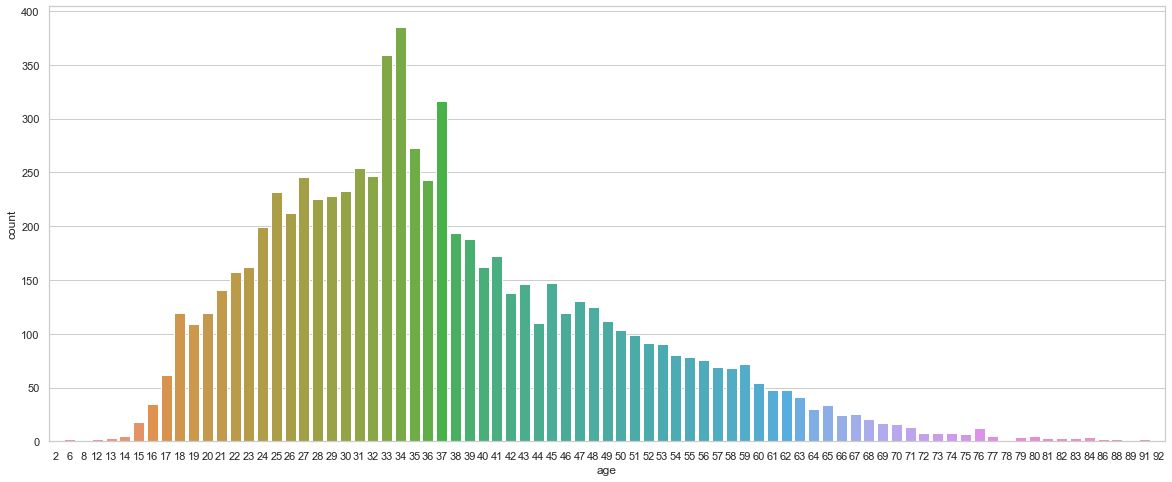

In [40]:
fig, ax = plt.subplots(figsize = (20,8))
sns.countplot(x='age', data=df)
plt.show()

In [41]:
# 30-44 year olds are the largest age group represented with 43.7% of deaths, followed by 18-29 year olds with 29.7%
df['age_binned'].value_counts()/len(df['age_binned'])

30-44       0.438281
18-29       0.297489
45-59       0.179571
60-75       0.045747
Under 18    0.032602
Over 75     0.006310
Name: age_binned, dtype: float64

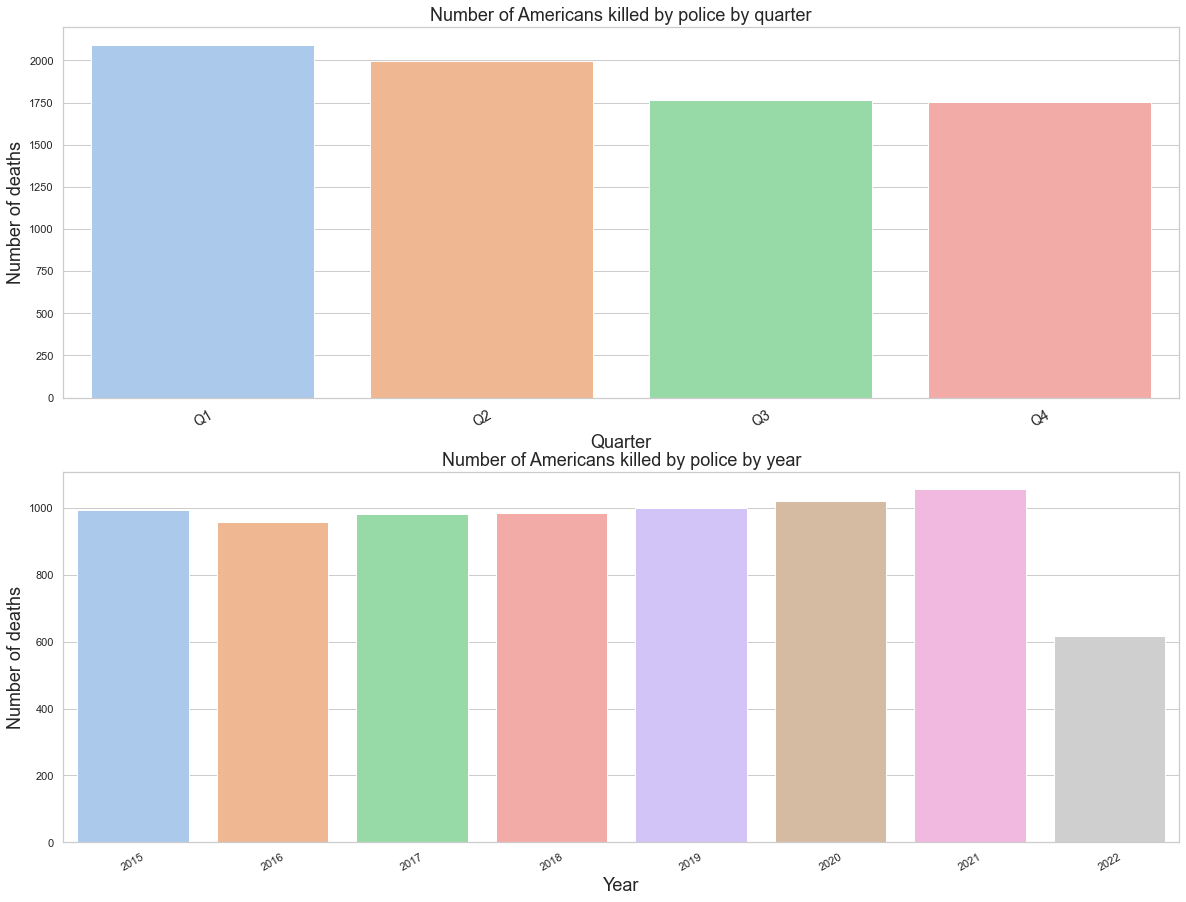

In [42]:
fig, ax = plt.subplots(2,1, figsize=(20,15))

#state_dist = sns.countplot(x = df.sort_values(by='state')['state'], ax=ax[0])
#state_dist.set_xticklabels(labels=df.sort_values(by='state')['state'].unique(), rotation=30)
#state_dist.set_title('Police shooting deaths by state', fontsize=18)
#state_dist.set_xlabel('State', fontsize=18)
#state_dist.set_ylabel('Number of deaths', fontsize=18)

quarter_dist = sns.countplot(x = df.sort_values(by='quarter')['quarter'], data=df,ax=ax[0])
quarter_dist.set_xticklabels(labels=df.sort_values(by='quarter')['quarter'].unique(), rotation=30)
quarter_dist.set_title('Number of Americans killed by police by quarter', fontsize=18)
quarter_dist.set_xlabel('Quarter', fontsize=18)
quarter_dist.set_xticks(ticks=[0,1,2,3],labels=['Q1','Q2','Q3','Q4'], fontsize=14)
quarter_dist.set_ylabel('Number of deaths', fontsize=18)

year_dist = sns.countplot(x = df.sort_values(by='year')['year'], data=df,ax=ax[1])
year_dist.set_xticklabels(labels=df.sort_values(by='year')['year'].unique(), rotation=30)
year_dist.set_title('Number of Americans killed by police by year', fontsize=18)
year_dist.set_xlabel('Year', fontsize=18)
year_dist.set_ylabel('Number of deaths', fontsize=18)

plt.show()

In [43]:
months = df.month.value_counts()

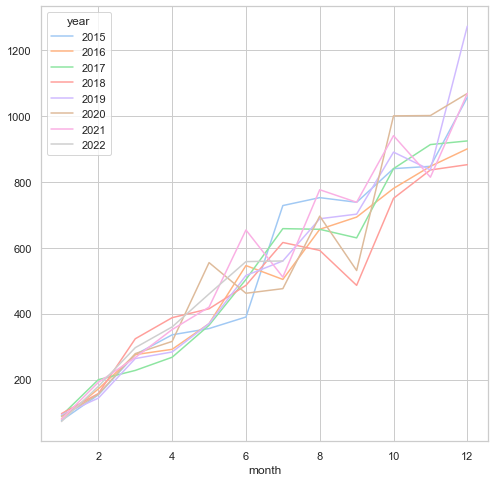

In [44]:
# pivot table summing is off
df.pivot_table(index='month', columns='year', values='count', aggfunc={'month':'sum'}).plot(figsize=(8,8))                                                                             
plt.show()

In [45]:
d = df.groupby([df.month, df.year])['count'].sum()

In [46]:
d = d.unstack().cumsum()

In [47]:
d

year    2015   2016   2017   2018   2019    2020    2021   2022
month                                                          
1       76.0   81.0   91.0   97.0   93.0    88.0    80.0   73.0
2      153.0  167.0  191.0  176.0  165.0   166.0   176.0  163.0
3      245.0  259.0  267.0  284.0  253.0   259.0   265.0  262.0
4      329.0  332.0  334.0  381.0  324.0   338.0   353.0  352.0
5      400.0  406.0  407.0  464.0  398.0   449.0   437.0  444.0
6      465.0  497.0  491.0  545.0  484.0   526.0   546.0  537.0
7      569.0  569.0  585.0  633.0  564.0   594.0   619.0  617.0
8      663.0  651.0  667.0  707.0  650.0   681.0   716.0    NaN
9      745.0  728.0  737.0  761.0  728.0   740.0   798.0    NaN
10     829.0  806.0  821.0  836.0  817.0   840.0   892.0    NaN
11     906.0  883.0  904.0  912.0  893.0   931.0   966.0    NaN
12     994.0  958.0  981.0  983.0  999.0  1020.0  1055.0    NaN

In [48]:
# cumulative sum is off in this table

#pivoted = df.pivot_table(index='month', columns='year', values='count', aggfunc={'month':'sum'})#.plot(figsize=(15,10))                                                                             
#plt.legend(loc='lower right')
#plt.show()
# count or sum for aggfunc
#pivoted

In [49]:
pivoted = df.pivot_table(index='month', columns='year', values='count', aggfunc={'count':'sum'})#.plot(figsize=(15,10))                                                                             
#plt.legend(loc='lower right')
#plt.show()
# count or sum for aggfunc
pivoted

year    2015  2016   2017   2018   2019   2020   2021  2022
month                                                      
1       76.0  81.0   91.0   97.0   93.0   88.0   80.0  73.0
2       77.0  86.0  100.0   79.0   72.0   78.0   96.0  90.0
3       92.0  92.0   76.0  108.0   88.0   93.0   89.0  99.0
4       84.0  73.0   67.0   97.0   71.0   79.0   88.0  90.0
5       71.0  74.0   73.0   83.0   74.0  111.0   84.0  92.0
6       65.0  91.0   84.0   81.0   86.0   77.0  109.0  93.0
7      104.0  72.0   94.0   88.0   80.0   68.0   73.0  80.0
8       94.0  82.0   82.0   74.0   86.0   87.0   97.0   NaN
9       82.0  77.0   70.0   54.0   78.0   59.0   82.0   NaN
10      84.0  78.0   84.0   75.0   89.0  100.0   94.0   NaN
11      77.0  77.0   83.0   76.0   76.0   91.0   74.0   NaN
12      88.0  75.0   77.0   71.0  106.0   89.0   89.0   NaN

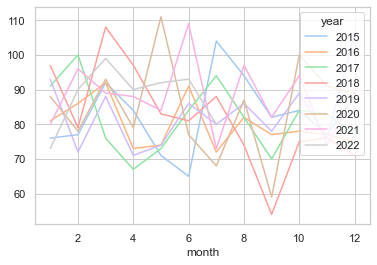

In [50]:
pivoted.plot()
plt.show()

In [51]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=d.index, y=d[2015],
                    mode='lines+markers',
                    name='2015', line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=d.index, y=d[2016], name = '2016',
                         line=dict(color='orangered', width=4)))
fig.add_trace(go.Scatter(x=d.index, y=d[2017], name = '2017',
                         line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x=d.index, y=d[2018], name = '2018',
                         line=dict(color='lightseagreen', width=4)))
fig.add_trace(go.Scatter(x=d.index, y=d[2019], name = '2019',
                         line=dict(color='powderblue', width=4)))
fig.add_trace(go.Scatter(x=d.index, y=d[2020], name = '2020',
                         line=dict(color='purple', width=4)))
fig.add_trace(go.Scatter(x=d.index, y=d[2021], name = '2021',
                         line=dict(color='gray', width=4)))
fig.add_trace(go.Scatter(x=d.index, y=d[2022], name = '2022',
                         line=dict(color='mediumorchid', width=4)))

fig.update_layout(title={'text': 'Fatal Police Shootings by Year', 'xanchor': 'center', 'yanchor': 'top','y':0.9,
                         'x':0.45}, xaxis_title="Month", yaxis_title="Number of People Killed",
                  legend_title={'text': 'Year'}, font=dict(family="Courier New, monospace", size=16, color="RebeccaPurple"))

fig.show()

more exploratory 

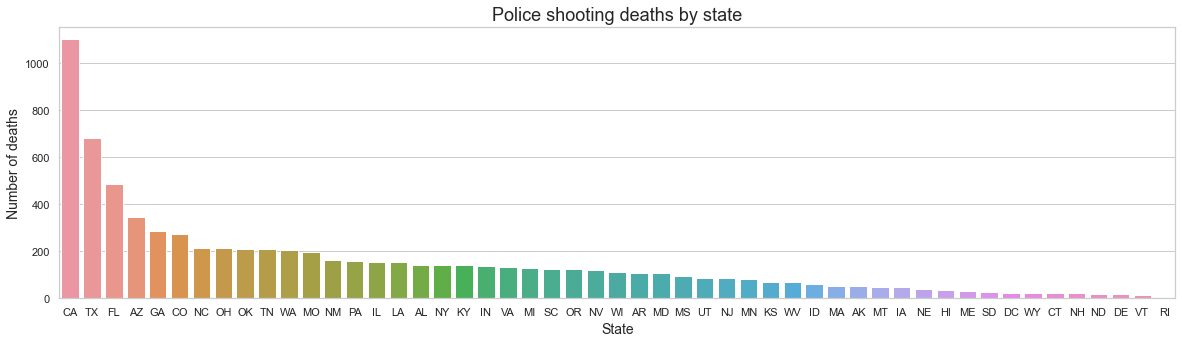

In [52]:
shot_by_state = df.state.value_counts()

plt.figure(figsize=(20, 5))
plt.title('Police shooting deaths by state', fontsize=18)
sns.barplot(shot_by_state.index, shot_by_state)
plt.ylabel('Number of deaths', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.show()

In [53]:
# plot total killings (2015-2022) by state per 100,000 people of that state (using 2020 population)
state_pop_2020 = state_pop['PopEstimate2020'].drop('Total').sort_index(ascending=True)
shot_by_state = df.state.value_counts().sort_index(ascending=True)

In [54]:
adj_shot_by_state = round(shot_by_state/(state_pop_2020/100000), 2).sort_values(ascending=False)
adj_shot_by_state.head(5)

NM    7.70
AK    7.10
OK    5.33
AZ    4.85
CO    4.75
dtype: float64

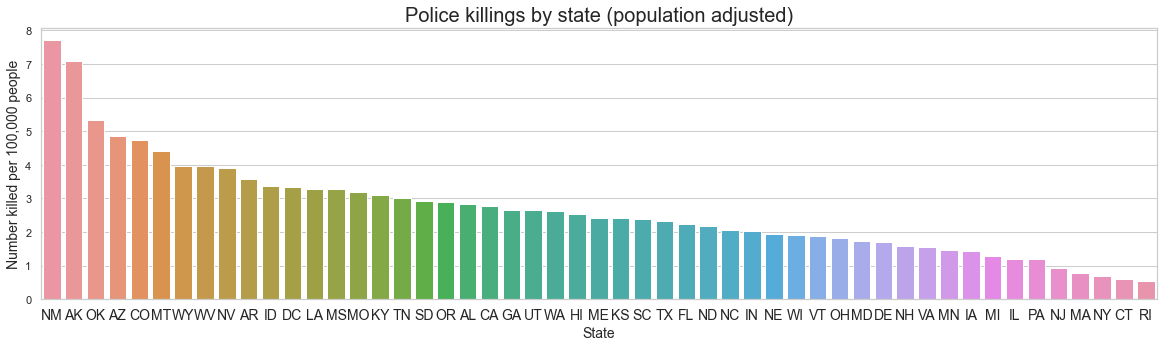

In [55]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(adj_shot_by_state.index, adj_shot_by_state, ax=ax)
plt.title('Police killings by state (population adjusted)', fontsize=20)
plt.xlabel('State', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Number killed per 100,000 people', fontsize=14)
plt.show()

In [56]:
# very different from states with actual highest number of killings (higher population states)

In [57]:
shot_by_city = df.city.value_counts()
shot_by_city_top20 = shot_by_city.head(20)

In [58]:
len(df['city'])

7607

In [59]:
len(shot_by_city)

3123

In [60]:
df[df.city.duplicated()]

date manner_of_death         armed  age gender    race        city  \
9    2015-08-05            shot           gun   40      M   White      Tacoma   
14   2015-12-06            shot           gun   35      M   White     Seattle   
19   2016-01-28            shot       vehicle   32      F  Native      Tacoma   
20   2016-02-20            shot           gun   41      M   Black    Lakewood   
21   2016-02-21            shot  undetermined   46      M   Black     Seattle   
...         ...             ...           ...  ...    ...     ...         ...   
7596 2019-08-09            shot    toy weapon   62      M   White  Montpelier   
7598 2021-08-05            shot       unarmed   35      M    None    Hartford   
7599 2021-08-25            shot  undetermined   33      M    None     Rutland   
7604 2018-09-07            shot           gun   28      M   Black   Pawtucket   
7605 2021-11-22            shot           gun   32      M    None     Warwick   

     state  signs_of_mental_illness threat_level  ...  year  quarter  \
9       WA                    False       attack  ...  2015        3   
14      WA                    False       attack  ...  2015        4   
19      WA                    False        other  ...  2016        1   
20      WA                    False       attack  ...  2016        1   
21      WA                    False        other  ...  2016        1   
...    ...                      ...          ...  ...   ...      ...   
7596    VT                     True       attack  ...  2019        3   
7598    VT                    False       attack  ...  2021        3   
7599    VT                    False        other  ...  2021        3   
7604    RI                    False       attack  ...  2018        3   
7605    RI                     True       attack  ...  2021        4   

        state_name PopEstimate2015 PopEstimate2016 PopEstimate2017  \
9       Washington         7163657         7294771         7423362   
14      Washington         7163657         7294771         7423362   
19      Washington         7163657         7294771         7423362   
20      Washington         7163657         7294771         7423362   
21      Washington         7163657         7294771         7423362   
...            ...             ...             ...             ...   
7596       Vermont          625216          623657          624344   
7598       Vermont          625216          623657          624344   
7599       Vermont          625216          623657          624344   
7604  Rhode Island         1056065         1056770         1055673   
7605  Rhode Island         1056065         1056770         1055673   

     PopEstimate2018  PopEstimate2019  PopEstimate2020  PopEstimate2021  
9            7523869          7614893          7718785          7738692  
14           7523869          7614893          7718785          7738692  
19           7523869          7614893          7718785          7738692  
20           7523869          7614893          7718785          7738692  
21           7523869          7614893          7718785          7738692  
...              ...              ...              ...              ...  
7596          624358           623989           642495           645570  
7598          624358           623989           642495           645570  
7599          624358           623989           642495           645570  
7604         1058287          1059361          1096229          1095610  
7605         1058287          1059361          1096229          1095610  

[4484 rows x 29 columns]

In [61]:
df.city.nunique()

3123

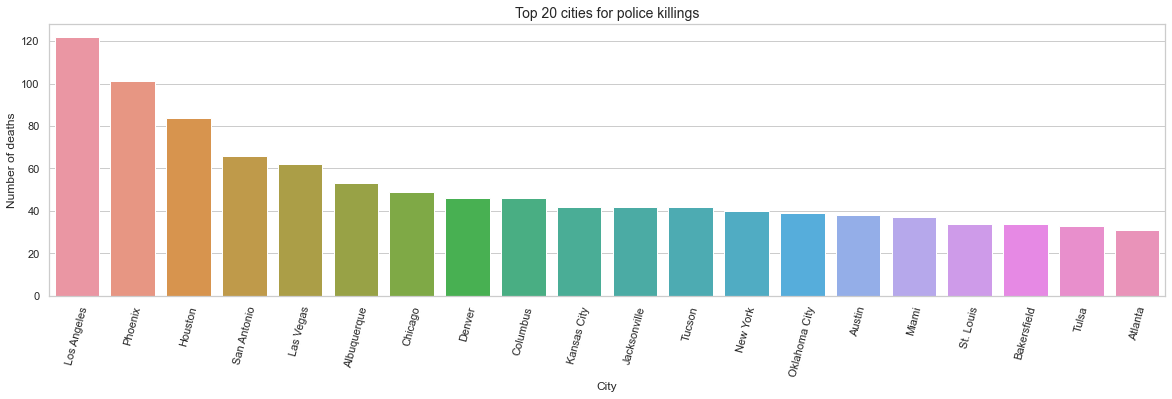

In [62]:
plt.figure(figsize=(20, 5))
plt.title('Top 20 cities for police killings', fontsize=14)
plt.xticks(rotation=75)
sns.barplot(shot_by_city_top20.index, shot_by_city_top20)
plt.ylabel('Number of deaths', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.show()

In [63]:
k = df.groupby([df.state, df.city])['count'].sum().sort_values(ascending=False)
k.head()

state  city       
CA     Los Angeles    122
AZ     Phoenix        100
TX     Houston         83
       San Antonio     66
NV     Las Vegas       61
Name: count, dtype: int64

In [64]:
ks = k.unstack(level=-1,fill_value=0)

In [65]:
ks.index

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object', name='state')

In [66]:
ks.head(20)

city   300 block of State Line Road  Abbeville  Aberdeen  Abilene  Abingdon  \
state                                                                         
AK                                0          0         0        0         0   
AL                                0          1         0        0         0   
AR                                0          0         0        0         0   
AZ                                0          0         0        0         0   
CA                                0          0         0        0         0   
CO                                0          0         0        0         0   
CT                                0          0         0        0         0   
DC                                0          0         0        0         0   
DE                                0          0         0        0         0   
FL                                0          0         0        0         0   
GA                                0          0         0        0         0   
HI                                0          0         0        0         0   
IA                                0          0         0        0         0   
ID                                0          0         0        0         0   
IL                                0          0         0        0         0   
IN                                0          0         0        0         0   
KS                                0          0         0        0         0   
KY                                0          0         0        0         0   
LA                                0          1         0        0         0   
MA                                0          0         0        0         0   

city   Abington Township  Acworth  Ada  Adams County  Addison  ...  Yorkville  \
state                                                          ...              
AK                     0        0    0             0        0  ...          0   
AL                     0        0    0             0        0  ...          0   
AR                     0        0    0             0        0  ...          0   
AZ                     0        0    0             0        0  ...          0   
CA                     0        0    0             0        0  ...          0   
CO                     0        0    0             6        0  ...          0   
CT                     0        0    0             0        0  ...          0   
DC                     0        0    0             0        0  ...          0   
DE                     0        0    0             0        0  ...          0   
FL                     0        0    0             0        0  ...          0   
GA                     0        3    0             0        0  ...          0   
HI                     0        0    0             0        0  ...          0   
IA                     0        0    0             0        0  ...          0   
ID                     0        0    0             0        0  ...          0   
IL                     0        0    0             0        0  ...          1   
IN                     0        0    0             0        0  ...          0   
KS                     0        0    0             0        0  ...          0   
KY                     0        0    0             0        0  ...          0   
LA                     0        0    0             0        0  ...          0   
MA                     0        0    0             0        0  ...          0   

city   Youngstown  Youngtown  Yreka  Yuba City  Yucca Valley  Yulee  Yuma  \
state                                                                       
AK              0          0      0          0             0      0     0   
AL              0          0      0          0             0      0     0   
AR              0          0      0          0             0      0     0   
AZ              0          1      0          0             0      0     5   
CA              

In [67]:
coord_df['city/state'] = coord_df['city'] + ', ' + coord_df['state']
df['city/state'] = df['city'] + ', ' + df['state']

In [68]:
df['city/state'].value_counts()

Los Angeles, CA        122
Phoenix, AZ            100
Houston, TX             83
San Antonio, TX         66
Las Vegas, NV           61
                      ... 
Longmont, CO             1
University City, MO      1
Mountain Grove, MO       1
Cotter, MO               1
Woonsocket, RI           1
Name: city/state, Length: 3592, dtype: int64

In [69]:
#top20_cams.groupby(['city','year'])
top20_cams_by_year = df.groupby([df.city, df.year])['count','body_camera'].sum().sort_values(by='count', ascending=False)
cams_by_city = df.groupby([df.city])['count','body_camera'].sum().sort_values(by='count', ascending=False)

In [70]:
top20_cams = cams_by_city[:20]

In [71]:
top20_cams

count  body_camera
city                             
Los Angeles      122           25
Phoenix          101           15
Houston           84           20
San Antonio       66           11
Las Vegas         62           28
Albuquerque       53           10
Chicago           49           12
Columbus          46            7
Denver            46            2
Tucson            42            6
Kansas City       42            3
Jacksonville      42            9
New York          40            9
Oklahoma City     39           15
Austin            38            9
Miami             37            2
St. Louis         34            0
Bakersfield       34           10
Tulsa             33            4
Atlanta           31            3

In [72]:
top20_cams['no_body_camera'] = top20_cams['count'] - top20_cams['body_camera']

/var/folders/v_/wdytmqyx1377p1m8yrz0tdrr0000gn/T/ipykernel_9992/1872087179.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
len(top20_cams['body_camera'])

20

In [74]:
len(top20_cams)

20

In [75]:
#top20_cams['city'] = top20_cams.index.values

In [76]:
#top20_cams['city'] = top20_cams.index
top20_cam = top20_cams.groupby(['city', 'no_body_camera', 'body_camera']).size().reset_index()


In [77]:
top20_cams

count  body_camera  no_body_camera
city                                             
Los Angeles      122           25              97
Phoenix          101           15              86
Houston           84           20              64
San Antonio       66           11              55
Las Vegas         62           28              34
Albuquerque       53           10              43
Chicago           49           12              37
Columbus          46            7              39
Denver            46            2              44
Tucson            42            6              36
Kansas City       42            3              39
Jacksonville      42            9              33
New York          40            9              31
Oklahoma City     39           15              24
Austin            38            9              29
Miami             37            2              35
St. Louis         34            0              34
Bakersfield       34           10              24
Tulsa             33            4              29
Atlanta           31            3              28

In [78]:
#top20_cams['percent'] = top20_cams['body_camera'] / top20_cams['count']
#top20_cam['percent'] = top20_cams.groupby(['no_body_camera', 'body_camera']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
#text = top20_cams['percent'].apply(lambda x: '{0:1.2f}%'.format(x))
#top20_cams['percent_no'] = top20_cams['no_body_camera'] / top20_cams['count']


In [79]:
top20_cams

count  body_camera  no_body_camera
city                                             
Los Angeles      122           25              97
Phoenix          101           15              86
Houston           84           20              64
San Antonio       66           11              55
Las Vegas         62           28              34
Albuquerque       53           10              43
Chicago           49           12              37
Columbus          46            7              39
Denver            46            2              44
Tucson            42            6              36
Kansas City       42            3              39
Jacksonville      42            9              33
New York          40            9              31
Oklahoma City     39           15              24
Austin            38            9              29
Miami             37            2              35
St. Louis         34            0              34
Bakersfield       34           10              24
Tulsa             33            4              29
Atlanta           31            3              28

In [80]:
# rates of body cam usage in top 20 cities
# stacked bar plot
fig = px.histogram(top20_cams, x=top20_cams.index, y=['no_body_camera','body_camera'],
             title='Body Camera Usage in Top 20 Cities for Police Killings', barnorm='percent', text_auto='.1f')
fig.update_layout(xaxis={'categoryorder':'total descending'}, yaxis={"ticksuffix":"%"})
fig.show()

In [81]:
# rates of body cam usage in top 20 cities
# stacked bar plot
fig = px.histogram(top20_cams, x=top20_cams.index, y=['no_body_camera','body_camera'],
             title='Body Camera Usage in Top 20 Cities for Police Killings')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [82]:
cities = list(top20_cams.index)
top20_race = df.loc[df['city'].isin(cities)]


In [83]:
# rates of body cam usage in top 20 cities
# stacked bar plot
fig = px.histogram(top20_race, x='body_camera', y='count', color='race', title='Race Breakdown of Body Camera Usage - Top 20 Cities',
                   category_orders={'race':['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other', 'None']},
                   barnorm='percent', text_auto='.1f')
fig.update_layout(xaxis={'categoryorder':'total descending'}, yaxis={"ticksuffix":"%"})
fig.show()

In [84]:
# rates of body cam usage in top 20 cities
# stacked bar plot
fig = px.histogram(df, x='body_camera', y='count', color='race', title='Race Breakdown of Body Camera Usage',
                   category_orders={'race':['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other', 'None']},
                   barnorm='percent', text_auto='.1f')
fig.update_layout(xaxis={'categoryorder':'total descending'}, yaxis={"ticksuffix":"%"})
fig.show()

In [85]:
# with a body camera present or not, Black people are killed by police at a higher rate than the proportion of 
# the total population they compose.



In [86]:
# rates of body cam usage in top 20 cities
# stacked bar plot
fig = px.histogram(top20_race, x='city', y='count', color='race', title='Police Killings by Race - Top 20 Cities',
                  barnorm='percent', text_auto='.1f', category_orders={'race':['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other', 'None']})
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide', xaxis={'categoryorder':'total descending'},
                  xaxis_title='City', yaxis_title='Percent of Total', yaxis={"ticksuffix":"%"}, legend_title='Race')
fig.show()

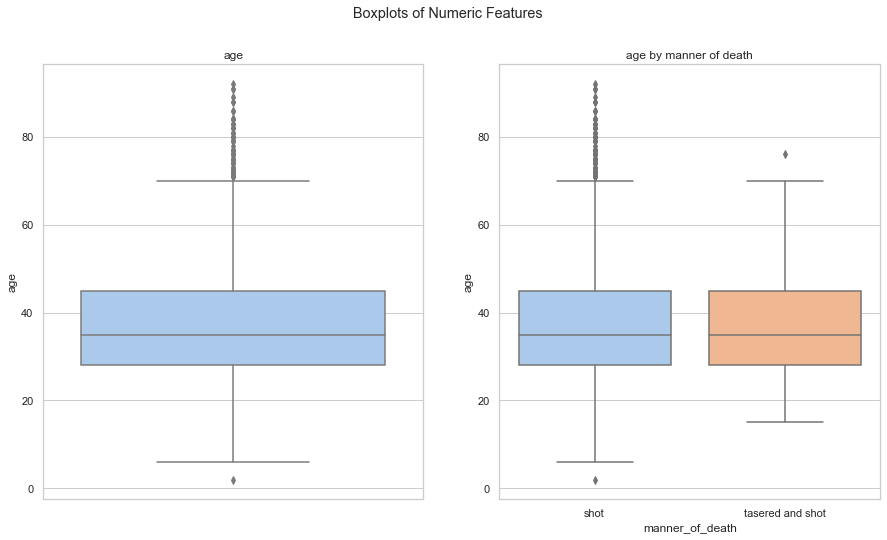

In [87]:
# box plots of Age
fig, ax = plt.subplots(1,2, figsize=(15,8))
plt.suptitle('Boxplots of Numeric Features')
sns.boxplot(y='age', data=df, ax=ax[0])
ax[0].set_title('age')

sns.boxplot(y='age',x='manner_of_death', data=df, ax=ax[1])
ax[1].set_title('age by manner of death')
plt.show()

In [88]:
# the police don't appear to utilize tasers in their very youngest and oldest encounters that result in death

In [89]:
shot_by_race = df['race'].value_counts()

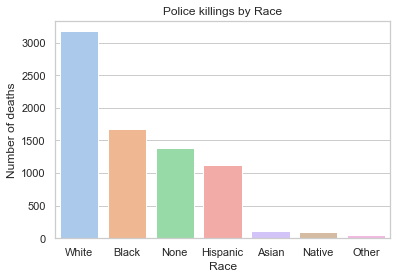

In [90]:
plt.title("Police killings by Race")
sns.barplot(shot_by_race.index, shot_by_race)
plt.ylabel('Number of deaths')
plt.xlabel('Race')
plt.show()

In [91]:
# most people killed are white
# 18.5% of shootings don't have race reported

In [92]:
# according to Census Bureau Quick Fact Sheet https://www.census.gov/quickfacts/fact/table/US/PST045221
# -- White: 75.8%, White not hispanic: 59.3%, Black: 13.6%, Asian alone: 6.1%, Hispanic/Latino: 18.9%, 
# Native American: 1.3%, Hawaiian Pacific Islander: 0.3%

race_prop = shot_by_race/len(df)
race_prop

White       0.417247
Black       0.219798
None        0.182069
Hispanic    0.147496
Asian       0.014460
Native      0.012751
Other       0.006179
Name: race, dtype: float64

In [93]:
# 

In [94]:
# account for population race proportions
race = {'White':'W','Black':'B', 'Asian':'A','Hispanic':'H', 'Native':'N','Other':'O', 'None':'No'}
by_race = df[['race','year','armed_3']].groupby(['race','year']).count().reset_index()
by_race['race'] = by_race['race'].map(race)
by_race.rename(columns={'armed_3':'number_of_deaths'}, inplace=True)

In [95]:
pop = pd.DataFrame({'race':['W','B','H','A','N','O'],
'2020_population':[0.593, 0.136, 0.189, 0.061, 0.013, 0.008]})
pop['2020_population'] = pop['2020_population']*331.5

In [96]:
by_race = pd.merge(by_race, pop, on='race')
by_race['deaths_per_mil'] = by_race['number_of_deaths'] / by_race['2020_population']
by_race.head()

race  year  number_of_deaths  2020_population  deaths_per_mil
0    A  2015                15          20.2215        0.741785
1    A  2016                14          20.2215        0.692332
2    A  2017                16          20.2215        0.791237
3    A  2018                21          20.2215        1.038499
4    A  2019                20          20.2215        0.989046

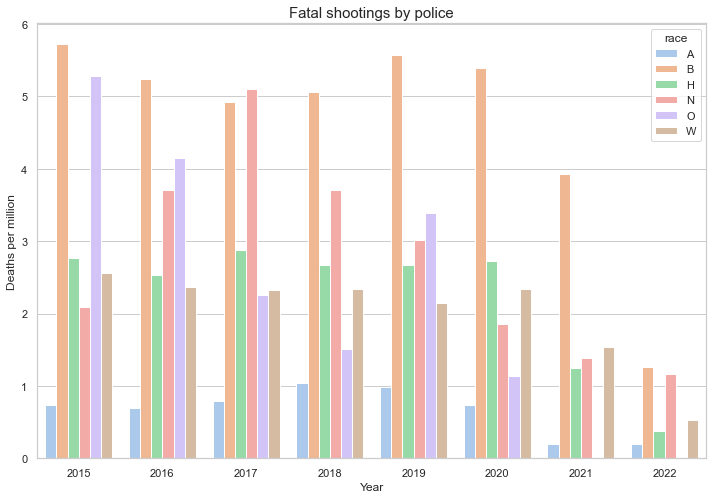

In [97]:
plt.figure(figsize=(12,8))
plt.title('Fatal shootings by police', fontsize=15)
sns.barplot(x='year', y='deaths_per_mil', hue='race', data=by_race)
plt.xlabel('Year')
plt.ylabel('Deaths per million')
plt.show()

In [98]:
# race (including 'None') as percentage of total
#race = {'White':'W','Black':'B', 'Asian':'A','Hispanic':'H', 'Native':'N','Other':'O', 'None':'No'}
perc_race = df[['race','year','armed_3']].groupby(['race','year']).count().reset_index()
#perc_race['race'] = perc_race['race'].map(race)
perc_race.rename(columns={'armed_3':'number_of_deaths'}, inplace=True)
perc_race.head() 

race  year  number_of_deaths
0  Asian  2015                15
1  Asian  2016                14
2  Asian  2017                16
3  Asian  2018                21
4  Asian  2019                20

In [99]:
df.race.unique()

array(['Asian', 'Hispanic', 'White', 'Native', 'Other', 'Black', 'None'],
      dtype=object)

In [100]:
fig = px.histogram(perc_race, x='year', y='number_of_deaths', color='race', title='Fatal Shootings by Race',
                  category_orders={'race':['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other', 'None']},
                   text_auto='.1f')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide',
                  xaxis_title='Year', yaxis_title='Deaths', legend_title='Race')
fig.show()

In [101]:
fig = px.bar(perc_race, x='year', y='number_of_deaths', color='race', title='Fatal Shootings by Race',
                  category_orders={'race':['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other', 'None']},
                   text_auto='.1f')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide',
                  xaxis_title='Year', yaxis_title='Total Number of Deaths', legend_title='Race')
fig.show()

In [102]:
# these numbers are skewed by the 'None' category for race 1,410 shootings total -- 18.52%

In [103]:
fig = px.histogram(by_race, x='year', y='deaths_per_mil', color='race', title='Percent of Fatal Shootings by Race (Excluding None)',
                  barnorm='percent', text_auto='.1f', category_orders={'race':['W', 'B', 'H', 'A', 'N', 'O']})
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide', xaxis_title='Year',
                  yaxis={"ticksuffix":"%"}, yaxis_title='Percent of Total Fatal Shootings', legend_title='Race')
fig.show()

In [104]:
# less Other in 2021 and 2022 and greater proportion of Hispanic and Black 

# what is this breakdown specifically for women?

In [105]:
# 343 fatal police shootings were of women
fem = df[df['gender'] == 'F']
# race breakdown
# account for population race proportions
race = {'White':'W','Black':'B', 'Hispanic':'H', 'Asian':'A', 'Native':'N','Other':'O', 'None':'No'}
fem_by_race = fem[['race','year','armed_3']].groupby(['race','year']).count().reset_index()
fem_by_race['race'] = fem_by_race['race'].map(race)
fem_by_race.rename(columns={'armed_3':'number_of_deaths'}, inplace=True)
#fem_by_race.head(20)

In [106]:
#fem_by_race = pd.merge(fem_by_race, pop, on='race')
#fem_by_race['deaths_per_mil'] = fem_by_race['number_of_deaths'] / (fem_by_race['2020_population']/2) 
# /2 b/c half pop is theoretically female

In [107]:
fem_by_race = fem_by_race.sort_values(by='year')

In [108]:
fem['race'].value_counts()/len(fem)

White       0.548105
Black       0.169096
None        0.142857
Hispanic    0.096210
Asian       0.020408
Native      0.014577
Other       0.008746
Name: race, dtype: float64

In [109]:
#df['race'].value_counts()
# (331.5*[0.593, 0.136, 0.189, 0.061, 0.013, 0.008]) == 196 W, 45 B, 63 H, 20 A, 4.3 N, 3 O 
#df[df['race']]
# if use this information, can make graphic simialr to last one on WaPo page

In [110]:
fig = px.bar(fem_by_race, x=fem_by_race.year, y='number_of_deaths', color='race', title='Fatal Shootings of Women by Race',
                  category_orders={'race':['W', 'B', 'H', 'A', 'N', 'O', 'No']}, text_auto='.1f')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide',
                  xaxis_title='Year', yaxis_title='Total Fatal Shootings of Women', legend_title='Race')
fig.show()

In [111]:
# an interesting pattern here

In [112]:
unarmed = df[df['armed_4'] == 'unarmed']
# 705 total unarmed
unarmed_by_race = unarmed['race'].value_counts()
unarmed_race_prop = unarmed_by_race/len(unarmed)

gun = df[df['armed_4'] == 'gun']
# 4414 total armed with gun
gun_by_race = gun['race'].value_counts()
gun_race_prop = gun_by_race/len(gun)

In [113]:
data['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', nan, 'shovel',
       'vehicle', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'undetermined', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'BB gun', 'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'railroad spikes',
       'stapler', 'beer bottle', 'unknown weapon', 'binoculars',
       'pellet gun', 'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'pair of scissors', 'pole', 'pick-axe', 'flashlight', 'baton',
       'spear', 'chair', 'pitchfork', 'hatchet and gun', 'rock',
       'piece of wood', 'pipe', 'glass shard', 'motorcycle',
       'pepper spray', 'metal rake

In [114]:
data.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

In [115]:
unarmed_race_prop

White       0.441894
Black       0.271162
Hispanic    0.167862
None        0.081779
Asian       0.017217
Native      0.012912
Other       0.007174
Name: race, dtype: float64

In [116]:
gun_race_prop

White       0.424366
Black       0.234601
None        0.182745
Hispanic    0.132926
Native      0.010870
Asian       0.009964
Other       0.004529
Name: race, dtype: float64

In [117]:
no_none = df.copy()
no_none = no_none[no_none['race'] != 'None']

In [118]:
no_none['race'].value_counts()/len(no_none)
# percentages change when None race is removed

White       0.510125
Black       0.268724
Hispanic    0.180328
Asian       0.017679
Native      0.015590
Other       0.007554
Name: race, dtype: float64

85% of deadly police shootings did not have body cam footage

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


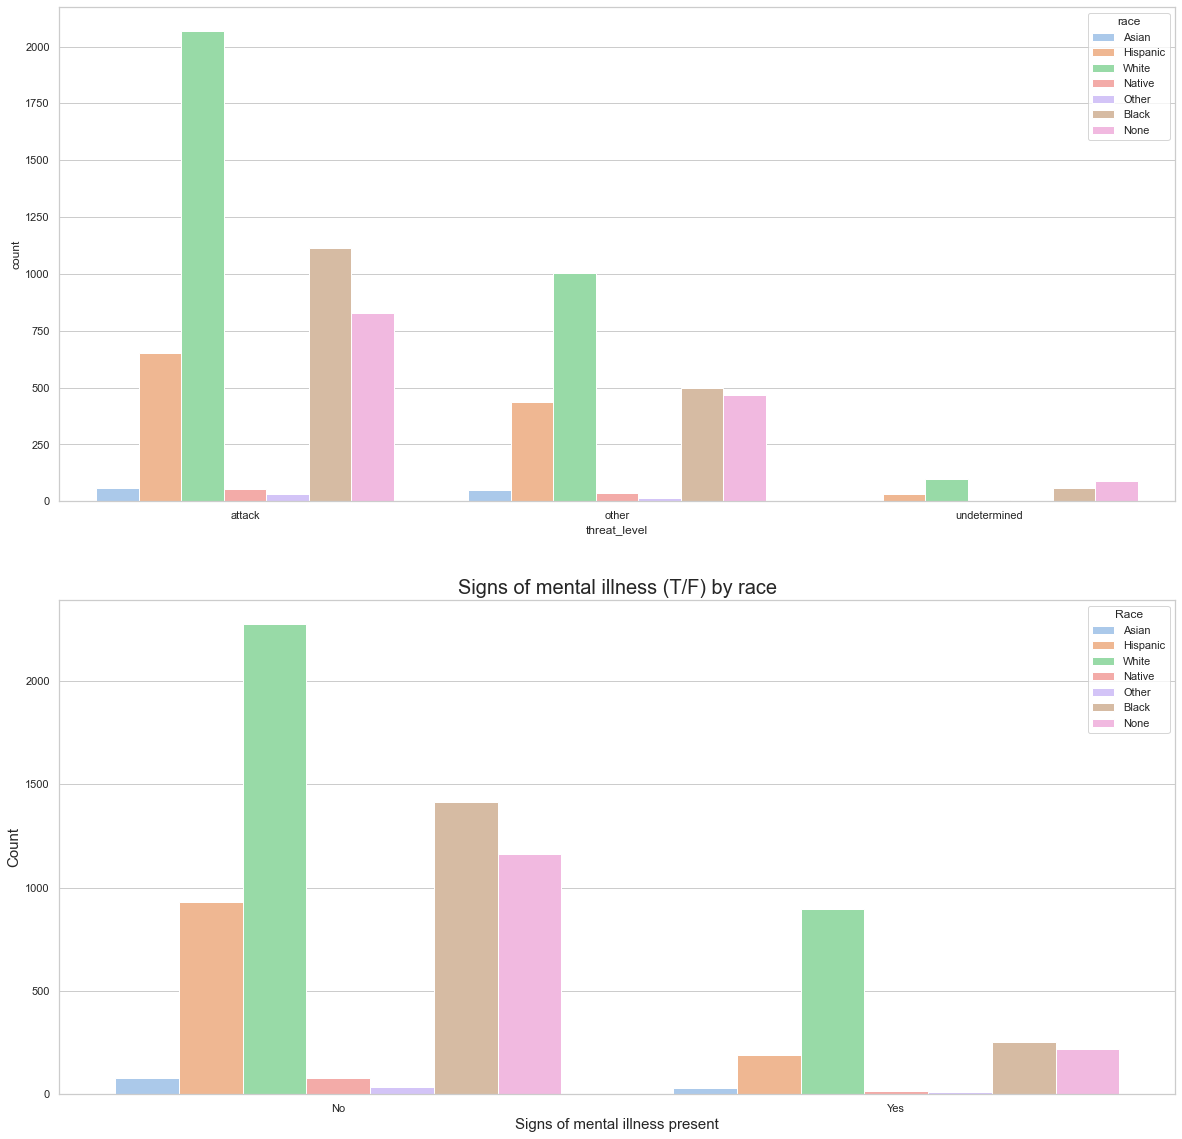

In [119]:
fig, ax = plt.subplots(2,1,figsize = (20,20))
#plt.rcParams['font.size'] = '25'

sns.countplot(x='threat_level', hue='race', data=df, ax=ax[0])
plt.title('Threat level by race', fontsize=20)
plt.xlabel('Threat level', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(title='Race')

sns.countplot(x='signs_of_mental_illness', hue='race', data=df, ax=ax[1])
plt.title('Signs of mental illness (T/F) by race', fontsize=20)
plt.xlabel('Signs of mental illness present', fontsize=15)
plt.xticks(ticks=[1,0],labels=['Yes', 'No'])
plt.ylabel('Count',fontsize=15)
plt.legend(title='Race')

#plt.tight_layout()
plt.show()

In [120]:
# adjust all of these for per 100,000 population ^^

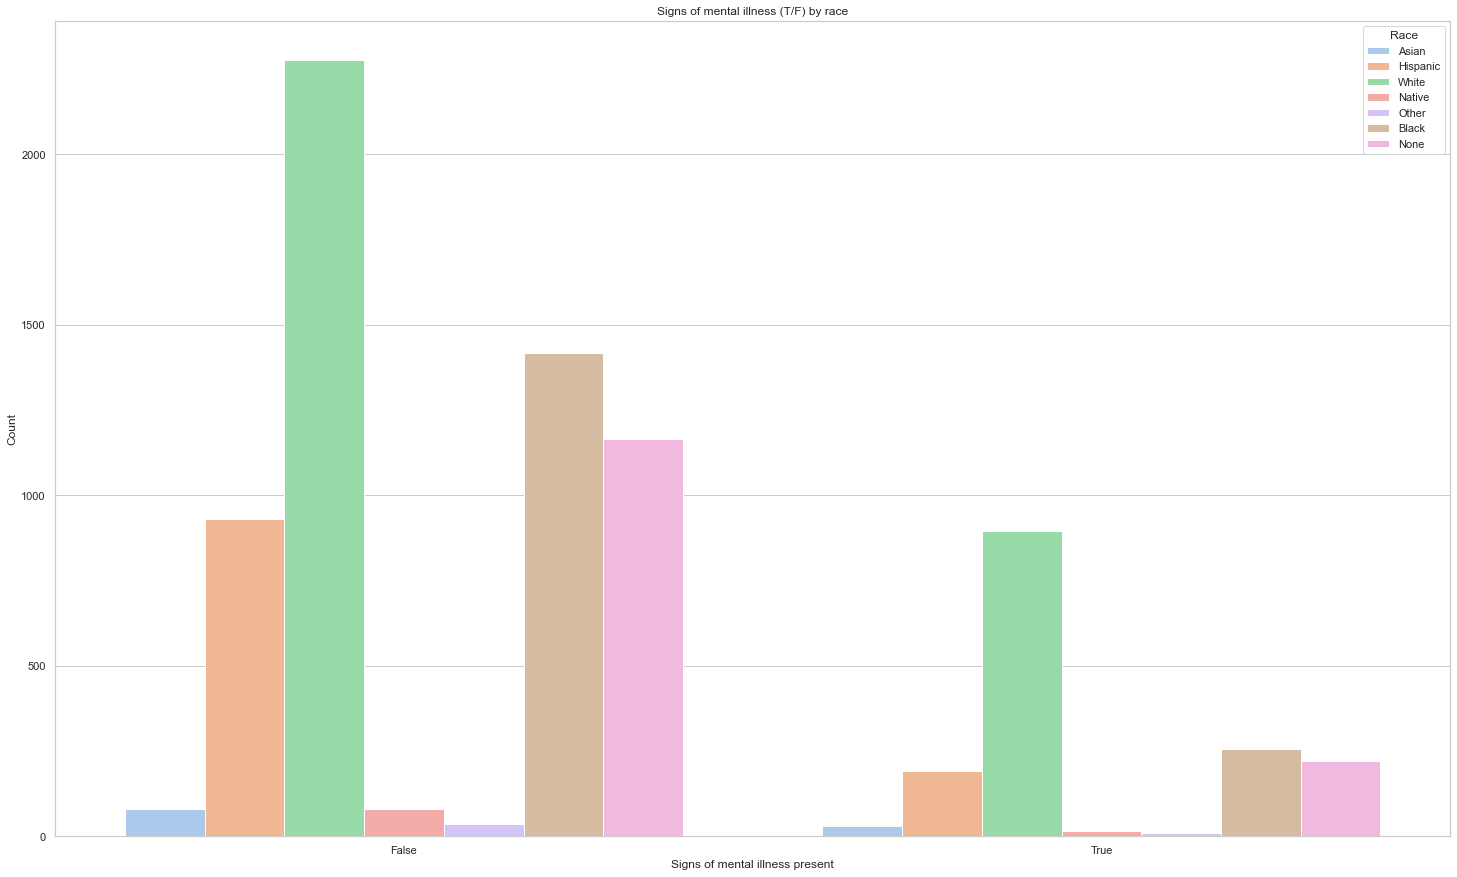

In [121]:
fig, ax = plt.subplots(figsize = (25,15))
plt.rcParams['font.size'] = '25'

sns.countplot(x='signs_of_mental_illness', hue='race', data=df)
plt.title('Signs of mental illness (T/F) by race')
plt.xlabel('Signs of mental illness present')
plt.ylabel('Count')
plt.legend(title='Race')
plt.show()

a significant number of shootings do not have race reported

In [122]:
# can use plotly cloropleth map for USA


In [123]:
# plot Race = 'None' by location
race_none = df[df['race'] == 'None']

In [124]:
df['city'].value_counts()

Los Angeles          122
Phoenix              101
Houston               84
San Antonio           66
Las Vegas             62
                    ... 
Assumption Parish      1
Huntley                1
Superior               1
Dillon                 1
Woonsocket             1
Name: city, Length: 3123, dtype: int64

In [125]:
df['city/state'].value_counts()

Los Angeles, CA        122
Phoenix, AZ            100
Houston, TX             83
San Antonio, TX         66
Las Vegas, NV           61
                      ... 
Longmont, CO             1
University City, MO      1
Mountain Grove, MO       1
Cotter, MO               1
Woonsocket, RI           1
Name: city/state, Length: 3592, dtype: int64

In [ ]:
# compare proportion of shootings per state to country overall and plot


In [ ]:
# export important dataframes as csv
# export important dataframes as csv
dataframe = (by_race, perc_race, shot_by_state, adj_shot_by_state, shot_by_city, shot_by_race, d, cams_by_city, top20_cams,
 top20_cams_by_year, fem_by_race, unarmed_by_race, gun_by_race, no_none)
names = ('by_race', 'perc_race', 'shot_by_state', 'adj_shot_by_state', 'shot_by_city', 'shot_by_race', 'd', 'cams_by_city', 'top20_cams',
 'top20_cams_by_year', 'fem_by_race', 'unarmed_by_race', 'gun_by_race', 'no_none')


x = zip(names, dataframe)
for (name, data) in x: 
    df = data
    name = name
    path = f'{name}.csv'
    df.to_csv(path)
    
df.to_csv(f'full_df.csv')

In [ ]:
df.to_csv(f'full_df(final).csv')
coord_df.to_csv(f'coord_df(final).csv')
by_race.to_csv(f'race_pop.csv')